In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display
import imageio
import HHBlits
from pathlib import Path
import json

from model_training import *


No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [2]:
# Notebook flags
do_plots = False

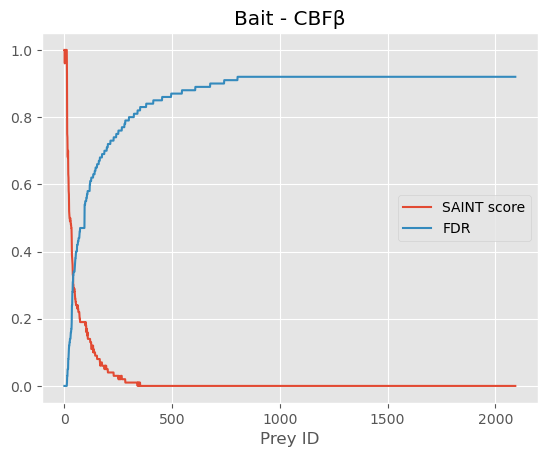

In [3]:
if do_plots:
    plot_saint_fdr(cb, title=title)
    # Look at the distribution of adjacency matices As

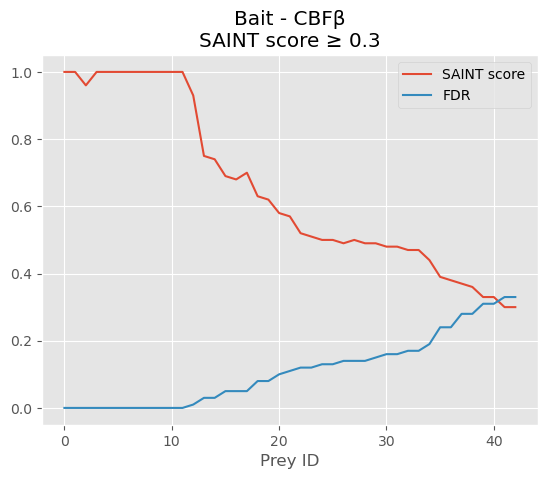

In [4]:
if do_plots:
    plot_saint_fdr(cb_train, title=title2)

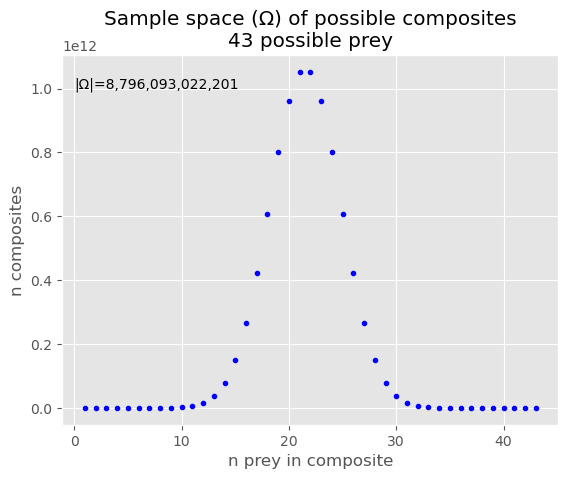

In [5]:
if do_plots:
    mp.plot_sample_space(Ss, textx=0, texty=1e12)

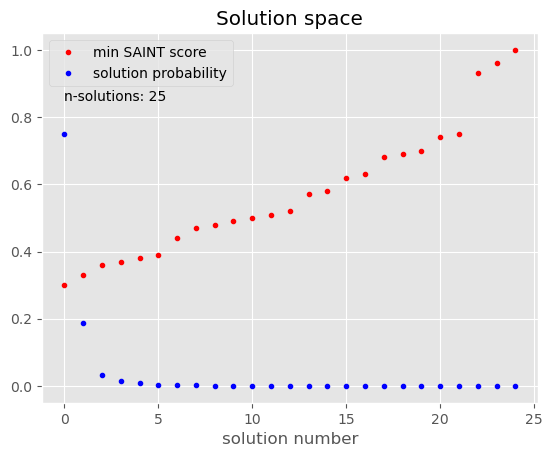

In [6]:
if do_plots:
    mp.plot_solution_space(Ss)

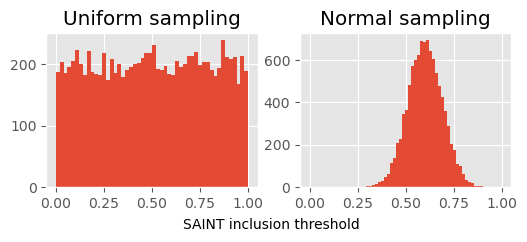

In [7]:
if do_plots:
    mp.plot_samples(Ss)

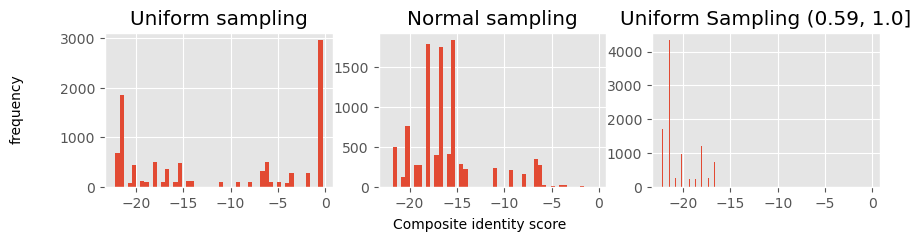

In [8]:
if do_plots:
    mp.plot_triple_samples(Ss)

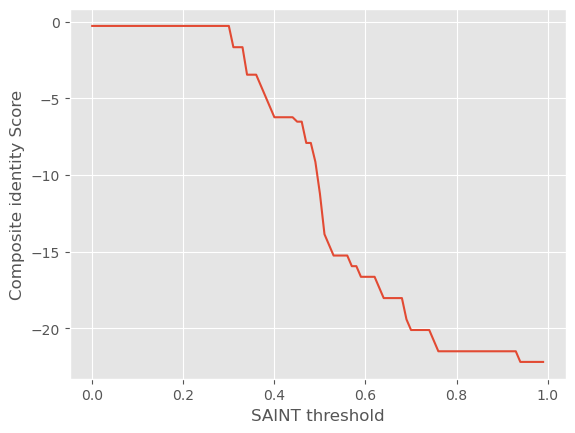

In [9]:
if do_plots:
    mp.plot_score_saint(Ss)

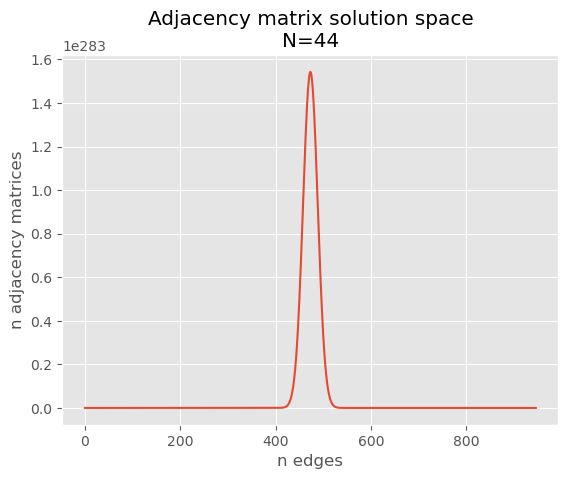

In [10]:
# Now what about enumerating Adjacency matrices?
if do_plots:
    _ = mp.plot_As_solution_space(44)

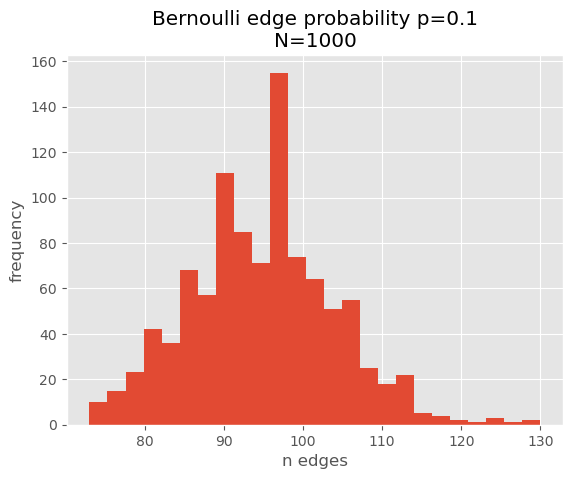

In [11]:

if do_plots:
    plot_edge_density(rseed=13, p=p, n_examples=n_examples)

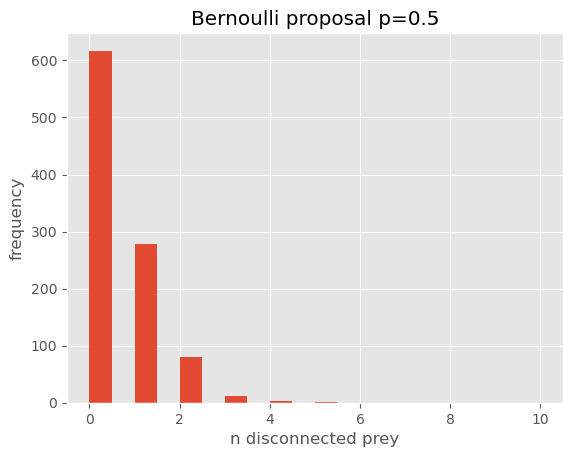

In [12]:
if do_plots:
    plot_disconnectivity(rseed=13, p=p, n_examples=n_examples)

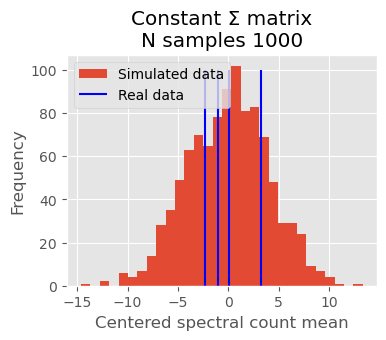

In [13]:
# Selecting the Wishart priors
# 
#V = get_scale_matrix_V(cb_train, scatter_diag_scaler=0.1)
#z = mp._move_Sigma_inv(key, V, 43, 43)

# Prior predictive distribtuion for this scatter matrix

mover_training = MoverTraining(rseed=13, cb_train=cb_train, nsamples=1000, style='ggplot')
if do_plots:
    mover_training.plot_mean_sim()

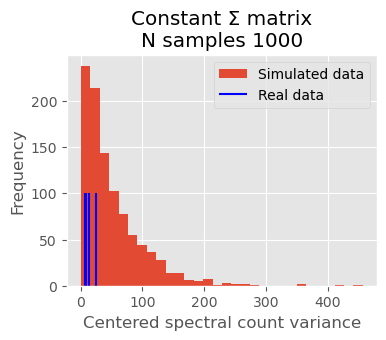

In [14]:
if do_plots:
    mover_training.plot_var_sim()

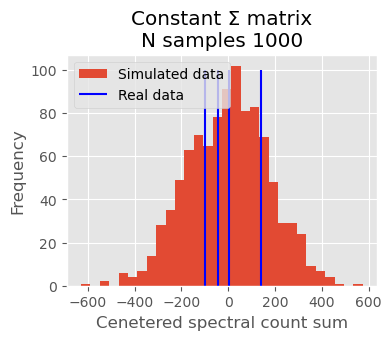

In [15]:
if do_plots:
    mover_training.plot_sum_sim()

In [16]:
# Conclusion - the choice of the scatter matrix is reasonable

# Do an Experiment where we sample Covaraiance matrices and then sample data

m43, v43, ss43 = do_sampled_sigma_experiment(1000, 43, 13)
m50, v50, ss50 = do_sampled_sigma_experiment(1000, 50, 13)

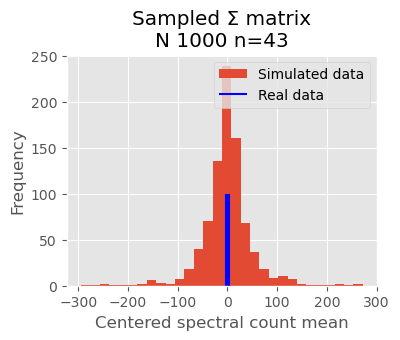

In [17]:
t0 = u'Sampled \u03A3 matrix' + f'\nN {mover_training.nsamples} n='
if do_plots:
    mover_training.mean_plot(np.array(m43), title=t0 + '43')

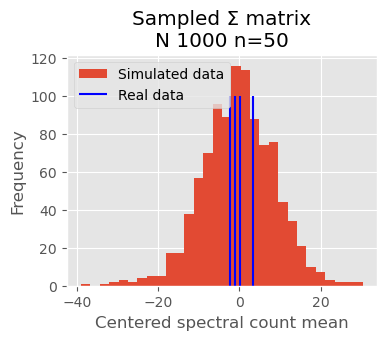

In [18]:
if do_plots:
    mover_training.mean_plot(np.array(m50), title=t0 + '50')

In [19]:
tv = u'Sampled \u03A3 matrix' + f'\nN {mover_training.nsamples} n='
if do_plots:
    mover_training.var_plot(v43,title=tv + '43')

In [20]:
if do_plots:
    mover_training.var_plot(v50, title=tv + '50')

In [21]:
ts = u'Sampled \u03A3 matrix' + f'\nN {mover_training.nsamples} n='
if do_plots:
    mover_training.sum_plot(np.array(ss43), title=ts + '43')

In [22]:
if do_plots:
    mover_training.sum_plot(np.array(ss50), title=ts + '50')

In [23]:
if do_plots:
    plot_wishart_dof_effect(m43, m50, mover_training.mean_sim, mover_training)

In [24]:
if do_plots:
    plot_wishart_dof_effect(v43, v50,
                            mover_training.var_sim,
                            mover_training,
                            nbins=30,
                            xmin=0,
                            xmax=1000,
                            xlabel="Centered Spectral Count Variance",
                            density=True, alpha=0.5,
                            textx=50, texty=0.012,
                            ymin=0, ymax=0.016,
                            vlines_operator=np.var)

In [25]:
if do_plots:
    plot_wishart_dof_effect(ss43, ss50,
                           mover_training.sum_sim,
                           mover_training,
                           vlines_operator=np.sum, nbins=30, 
                           xmin=-1000, xmax=1000,
                           textx=-900, texty=0.002,
                           ymin=0, ymax=0.0025,
                           title="Effect of n (degrees of freedom on the sample sum)",
                           xlabel="Centered spectral count sum")

In [26]:
# Let's understand the training data and benchmark

cb_all = cb_test.CullinBenchMark(cb_path)
df_all_03 = get_saint_threshold(cb_all, 0.3)
df_all_05 = get_saint_threshold(cb_all, 0.5)
analysis_all = CullinBenchMarkAnalysis(cb_all.data)
analysis_all_03 = CullinBenchMarkAnalysis(df_all_03)

/home/aji/Projects/dev/pynet/pyext/src/model_training.py:758: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data.loc[:, "organism"] = organisms


In [27]:
analysis_all

n conditions    6555
  viral    17    (0.26)%    
  human    6,535    (99.69)% 
  mouse    3    (0.05)%

n unique prey: 2,855
  viral    7    (0.25)% 
  human    2,847    (99.72)%
  mouse    1    (0.04)%


n bait    3
n uid     2,847
n nuid    8

----Human Bait-----
ELOB in prey set     True
CBFB in prey set     True
CUL5 in prey set     True

---Viral Proteins----
VIF  in prey set     True
TAT  in prey set     True
REV  in prey set     False
POLY in prey set     False
NEF  in prey set     False
GAG_POLY in prey set False
ENV_POLY in prey set False
------Mouse---------
IGHG1 in prey set    False

All bait in prey set True

n total proteins       2,855
n possible pairs       4,074,085

        

In [28]:
d = pd.DataFrame()

d['viral'] = [3, 2.61]
d['human'] = [112, 97.39]
d['mouse'] = [0, 0.0]

In [29]:
t = 1.0
df_t = get_saint_threshold(cb_all, t)
analysis_t = CullinBenchMarkAnalysis(df_t)
analysis_t

/home/aji/Projects/dev/pynet/pyext/src/model_training.py:758: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data.loc[:, "organism"] = organisms


n conditions    115
  viral    3    (2.61)%    
  human    112    (97.39)% 
  mouse    0    (0.0)%

n unique prey: 85
  viral    1    (1.18)% 
  human    84    (98.82)%
  mouse    0    (0.0)%


n bait    3
n uid     84
n nuid    1

----Human Bait-----
ELOB in prey set     True
CBFB in prey set     True
CUL5 in prey set     True

---Viral Proteins----
VIF  in prey set     True
TAT  in prey set     False
REV  in prey set     False
POLY in prey set     False
NEF  in prey set     False
GAG_POLY in prey set False
ENV_POLY in prey set False
------Mouse---------
IGHG1 in prey set    False

All bait in prey set True

n total proteins       85
n possible pairs       3,570

        

In [30]:
analysis_all.not_uid_set

{'IGHG1_MOUSE',
 'envpolyprotein',
 'gagpolyprotein',
 'nefprotein',
 'polpolyprotein',
 'revprotein',
 'tatprotein',
 'vifprotein'}

In [31]:
analysis_all_03

n conditions    359
  viral    3    (0.84)%    
  human    356    (99.16)% 
  mouse    0    (0.0)%

n unique prey: 295
  viral    1    (0.34)% 
  human    294    (99.66)%
  mouse    0    (0.0)%


n bait    3
n uid     294
n nuid    1

----Human Bait-----
ELOB in prey set     True
CBFB in prey set     True
CUL5 in prey set     True

---Viral Proteins----
VIF  in prey set     True
TAT  in prey set     False
REV  in prey set     False
POLY in prey set     False
NEF  in prey set     False
GAG_POLY in prey set False
ENV_POLY in prey set False
------Mouse---------
IGHG1 in prey set    False

All bait in prey set True

n total proteins       295
n possible pairs       43,365

        

In [32]:
# Map the viral vif protein
# Define the sequence identity parameters
# Use HHBlits to search pd

In [33]:
True & True & True

True

In [34]:
'Q13951' 

'Q13951'

In [35]:
analysis_all.data.loc[analysis_all.data['Prey'] == 'Q13951', :]

,Bait,Prey,PreyGene,Spec,SpecSum,AvgSpec,NumReplicates,ctrlCounts,AvgP,MaxP,TopoAvgP,TopoMaxP,SaintScore,FoldChange,BFDR,organism
7,CBFBwt_MG132,Q13951,PEBB_HUMAN,42|46|29|48,165,41.25,4,0|3|3|3|0|0|5|3|0|0|0|0,1.00,1.0,1.00,1.0,1.00,29.12,0.0,HUMAN
2125,CUL5wt_MG132,Q13951,PEBB_HUMAN,24|16|16|24,80,20.00,4,0|3|3|3|0|0|5|3|0|0|0|0,0.99,1.0,0.99,1.0,0.99,14.12,0.0,HUMAN
4473,ELOBwt_MG132,Q13951,PEBB_HUMAN,33|27|23|24,107,26.75,4,0|3|3|3|0|0|5|3|0|0|0|0,1.00,1.0,1.00,1.0,1.00,18.88,0.0,HUMAN


In [36]:
analysis_all_03

n conditions    359
  viral    3    (0.84)%    
  human    356    (99.16)% 
  mouse    0    (0.0)%

n unique prey: 295
  viral    1    (0.34)% 
  human    294    (99.66)%
  mouse    0    (0.0)%


n bait    3
n uid     294
n nuid    1

----Human Bait-----
ELOB in prey set     True
CBFB in prey set     True
CUL5 in prey set     True

---Viral Proteins----
VIF  in prey set     True
TAT  in prey set     False
REV  in prey set     False
POLY in prey set     False
NEF  in prey set     False
GAG_POLY in prey set False
ENV_POLY in prey set False
------Mouse---------
IGHG1 in prey set    False

All bait in prey set True

n total proteins       295
n possible pairs       43,365

        

In [37]:
analysis_all_03.create_uid_column()

/home/aji/Projects/dev/pynet/pyext/src/model_training.py:805: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data.loc[:, "UID"] = uids


In [38]:
analysis_all_03.data

,Bait,Prey,PreyGene,Spec,SpecSum,AvgSpec,NumReplicates,ctrlCounts,AvgP,MaxP,TopoAvgP,TopoMaxP,SaintScore,FoldChange,BFDR,organism,UID
0,CBFBwt_MG132,vifprotein,vifprotein,22|22|26|34,104,26.00,4,0|0|1|1|0|1|3|2|1|0|0|0,1.00,1.00,1.00,1.00,1.00,34.67,0.00,VIRAL,P69723
1,CBFBwt_MG132,Q9UBF6,RBX2_HUMAN,9|11|12|16,48,12.00,4,0|0|0|0|0|0|0|0|1|0|0|0,1.00,1.00,1.00,1.00,1.00,120.00,0.00,HUMAN,Q9UBF6
2,CBFBwt_MG132,Q9C0K0,BC11B_HUMAN,8|8|26|27,69,17.25,4,0|2|2|0|3|1|1|0|4|3|1|1,0.96,1.00,0.96,1.00,0.96,11.50,0.00,HUMAN,Q9C0K0
3,CBFBwt_MG132,Q93034,CUL5_HUMAN,78|77|66|99,320,80.00,4,0|0|0|0|0|0|0|1|0|0|1|0,1.00,1.00,1.00,1.00,1.00,480.00,0.00,HUMAN,Q93034
4,CBFBwt_MG132,Q8TEB1,DCA11_HUMAN,24|19|15|11,69,17.25,4,0|0|0|0|0|1|3|0|1|0|1|0,1.00,1.00,1.00,1.00,1.00,34.50,0.00,HUMAN,Q8TEB1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4600,ELOBwt_MG132,O75600,KBL_HUMAN,2|1|4|2,9,2.25,4,1|0|0|0|2|0|0|0|0|0|1|1,0.31,0.89,0.31,0.89,0.31,5.40,0.32,HUMAN,O75600
4601,ELOBwt_MG132,Q9Y6K9,NEMO_HUMAN,3|0|1|3,7,1.75,4,1|0|0|1|0|2|0|0|0|0|0|0,0.30,0.59,0.30,0.59,0.30,5.25,0.33,HUMAN,Q9Y6K9
4602,ELOBwt_MG132,Q96R06,SPAG5_HUMAN,2|1|3|4,10,2.50,4,0|0|0|2|2|0|1|0|1|0|0|0,0.30,0.69,0.30,0.69,0.30,5.00,0.33,HUMAN,Q96R06
4603,ELOBwt_MG132,Q5H9R7,PP6R3_HUMAN,2|2|7|5,16,4.00,4,2|3|0|0|4|1|0|1|1|1|2|2,0.30,0.87,0.30,0.87,0.30,2.82,0.33,HUMAN,Q5H9R7


# test out the assemble benchmark function
# long running cell
if True:
    """
    uids = list(set(analysis_all_03.data.loc[:, "UID"]))
    assert len(uids) == 295


    assemble_ground_truth("benchmark_03", 
                         uids,
                         min_seq_id_with_query=20,
                         min_seq_coverage_with_query=80,
                         min_e_value=1e-9,
                         hhblits_cpu=20,
                         make_dir=True,
                         get_fastas_1=True,
                         get_hhr_2=True,
                         get_pdb_pair_ids_3=True)
    """


In [39]:
%%bash
pwd

/home/aji/Projects/dev/pynet/pyext/src


In [41]:
pdb_df = pd.read_csv("benchmark_all_03/pdb_hits/counts.tsv", delim_whitespace="    ",
            names=["PDB ID", "count"])

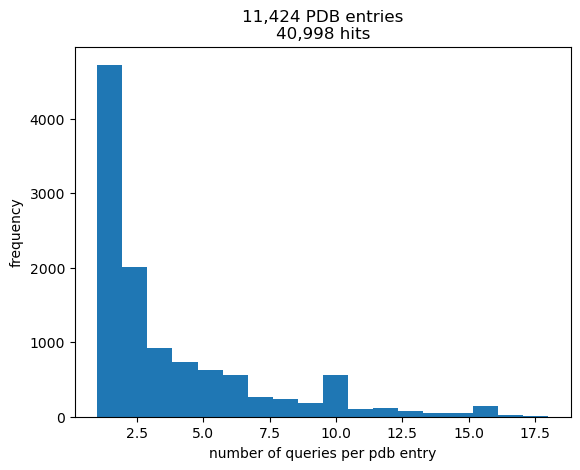

In [42]:
plt.title(f"{'{:,}'.format(len(pdb_df))} PDB entries\n{'{:,}'.format(np.sum(pdb_df['count']))} hits")
plt.hist(pdb_df["count"].values, bins=18, range=(1, 18))
plt.ylabel("frequency")
plt.xlabel("number of queries per pdb entry")
plt.show()
# what is the peak at 10?

In [44]:
homologs = json.load(open("benchmark_all_03/pdb_hits/homologs.json", 'r'))

In [45]:
# Populate the interaction pairs with the number of pdb entries they
# are found together in
from itertools import combinations
rows = list(set(analysis_all_03.data.loc[:, "UID"]))
rows = sorted(rows)
nrows = len(rows)
adjacency = np.zeros((nrows, nrows), dtype=int)

indicies = {uid: index for index, uid in enumerate(rows)}

for pdb_id, uid_list in homologs.items():
    if len(uid_list) < 1:
        assert False
    elif len(uid_list) == 1:
        uid = uid_list[0]
        index = indicies[uid]
        adjacency[index, index] += 1
    else:
        index_list = [indicies[uid] for uid in uid_list]
        index_list = sorted(index_list)
        pairs = list(combinations(index_list, 2))
        for pair in pairs:
            i = pair[0]
            j = pair[1]
            adjacency[i, j] += 1
        
        for index in index_list:
            adjacency[index, index] += 1
            
#adjacency = adjacency + np.triu(adjacency)
n_entries = np.sum(np.diag(adjacency))

In [46]:
np.triu(adjacency, k=1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 5],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 0, 0]])

In [47]:
import seaborn as sns

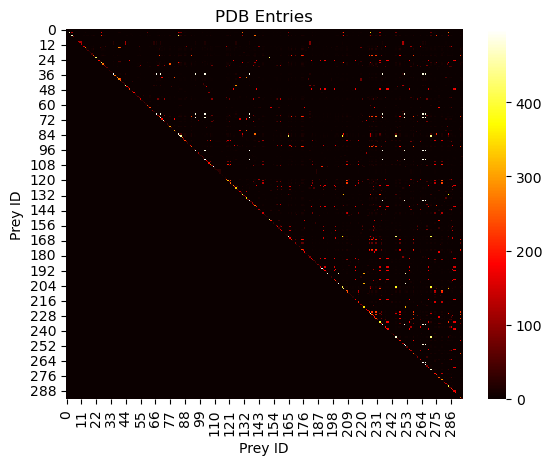

In [48]:
def plot_benchmark_pairs(adjacency):
    plt.title("PDB Entries")
    sns.heatmap(adjacency, cmap='hot')
    plt.xlabel("Prey ID")
    plt.ylabel("Prey ID")
    plt.show()
plot_benchmark_pairs(adjacency)

In [49]:
training_sel = analysis_all_03.data["Bait"] == "CBFBwt_MG132"
training_df = analysis_all_03.data.loc[training_sel, :]
training_uids = list(training_df["UID"])
training_uids = list(set(training_uids))
training_indicies = [indicies[uid] for uid in training_uids]


training_indicies = sorted(training_indicies)

training_adj = adjacency[:, training_indicies]
training_adj = training_adj[training_indicies, :]
assert training_adj.shape == (43, 43), training_adj.shape

index_to_uid = {index:uid for uid, index in indicies.items()}
labels = [index_to_uid[index] for index in training_indicies]

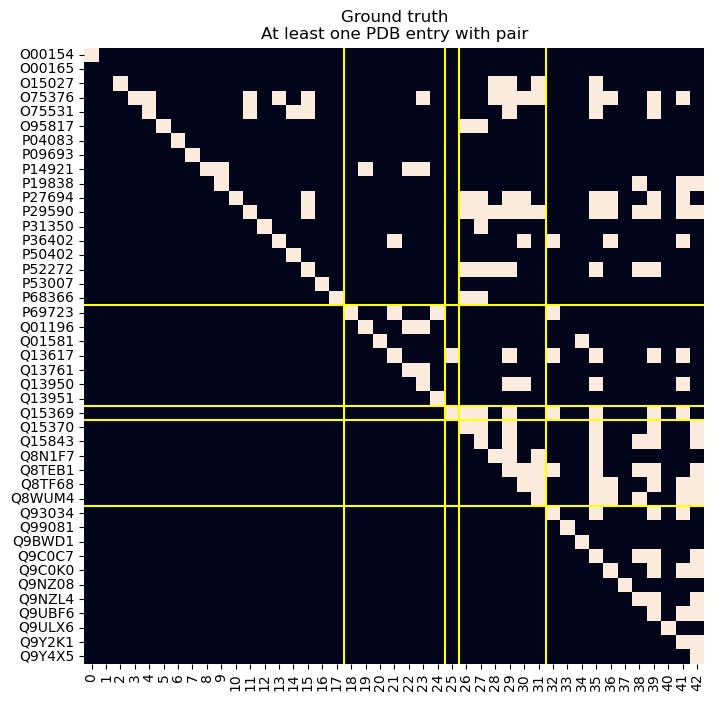

In [50]:
plt.figure(figsize=(8, 8))
plt.title("Ground truth\nAt least one PDB entry with pair")
sns.heatmap(training_adj > 0, cbar=False, yticklabels=labels)

lines = ['P69723', 'Q93034', 'Q15370', 'Q15369']
line_locs = [indicies[i] for i in lines]

locs = []
for loc in line_locs:
    locs.append(np.where(np.array(training_indicies) == loc)[0])

locs = locs
plt.vlines(locs,0, 100, color='yellow')
plt.hlines(locs, 0, 100, color='yellow')

# Andrej's comment - what would be interesting
# color blue if they involve a physical contact
# interesting to see what fraction are direct physical interactions vs shared complex membership
# Process from the persepective of the difference being in the same complex
# vs being in the same complex and directly physically interaction
# could say a sentance or two more about a certain maximal number of interactions
# If you derive a prior for the number of edges per node - is it only from direct physical interactions?
# consider everything we say about these interactions carefully - direct vs indirect
# could add aditional priors, 
# - could have one ignoring direct vs indirect issue
# - could have one from packing spheres
# - packing spheres won't be unlimited

In [ ]:
locs

<AxesSubplot: title={'center': 'Ground Truth\nNumber of PDB entries with pair'}>

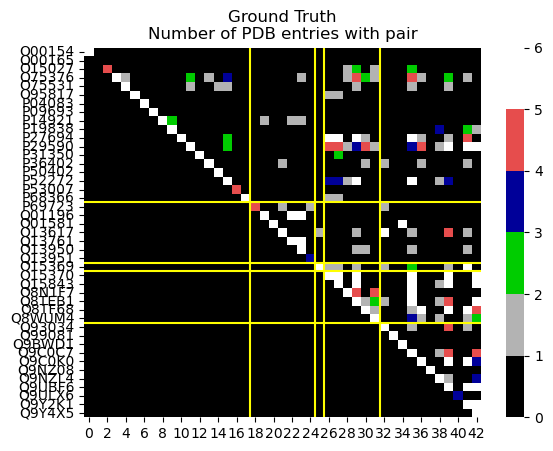

In [51]:
import matplotlib
plt.title("Ground Truth\nNumber of PDB entries with pair")
locs = locs
vmax = 6
colors = [(0, 0, 0), (0.7, 0.7, 0.7), (0, 0.8, 0), (0, 0, 0.6), (0.9, 0.3, 0.3), (1, 1, 1)]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('RGB20', colors, N=vmax)
plt.vlines(locs,0, 100, color='yellow')
plt.hlines(locs, 0, 100, color='yellow')
sns.heatmap(training_adj, yticklabels=labels, vmax=vmax, cmap=cmap)

In [ ]:
import sklearn
import sklearn.metrics
binary_truth = training_adj > 0
npos = np.sum(np.tril(binary_truth.T, k=-1))
nneg = np.sum(np.tril(binary_truth.T == 0, k=-1))
ntotal = npos + nneg
percent_pos = npos / ntotal
percent_neg = nneg / ntotal

# Null model

key = jax.random.PRNGKey(13)
nsamples=10000
nullAdj = jax.random.bernoulli(key, p=0.1528, shape=(ntotal, nsamples))
truth = np.ravel(np.tril(binary_truth.T, k=-1))[0:903]

In [52]:
accuracy = np.zeros(nsamples)
precision = np.zeros(nsamples)
tpr = np.zeros(nsamples)
fpr = np.zeros(nsamples)
tnr = np.zeros(nsamples)
fnr = np.zeros(nsamples)
for i in range(nsamples):
    acc = sklearn.metrics.accuracy_score(truth, nullAdj[:, i])
    prec = sklearn.metrics.precision_score(truth, nullAdj[:, i])
    accuracy[i] = acc
    precision[i] = prec
    


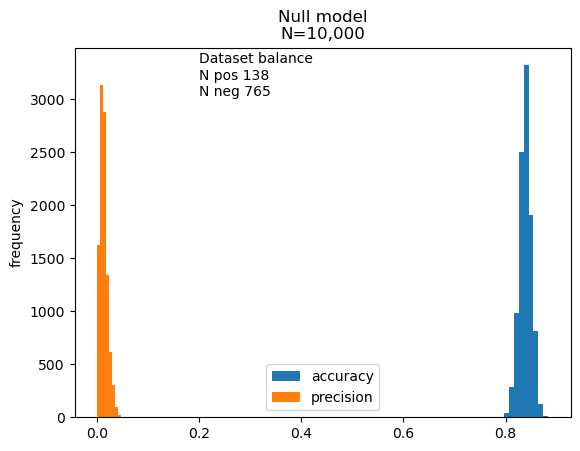

In [53]:


s = '{:,}'.format(nsamples)
text=f"Dataset balance\nN pos {npos}\nN neg {nneg}"
plt.title(f"Null model\nN={s}")
plt.hist(accuracy, label="accuracy")
plt.hist(precision, label="precision")
plt.ylabel("frequency")
plt.text(0.2, 3030, text)
plt.legend()
plt.show()

# Better standard could be ROC and PRC curves

In [54]:
# Create the proposal distribution
probs = np.sum(nullAdj, axis=1) / nsamples
precision, recall, prec_thresh = sklearn.metrics.precision_recall_curve(truth, probs)
fpr, tpr, acc_thresh = sklearn.metrics.roc_curve(truth, probs)
auroc = sklearn.metrics.roc_auc_score(truth, probs)
auroc = np.round(auroc, 2)

Text(0.1, 0.9, 'AUROC: 0.59')

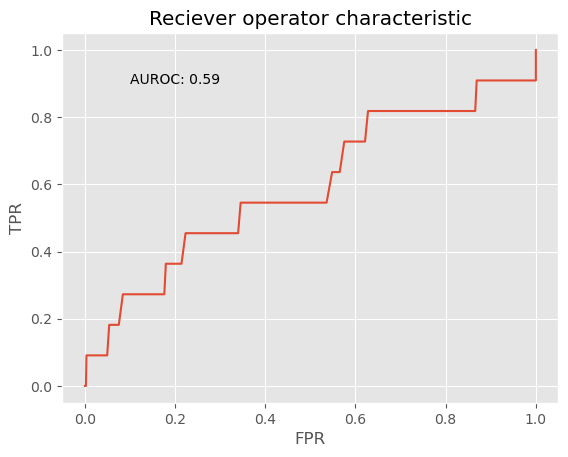

In [58]:
plt.style.use('ggplot')
plt.title("Reciever operator characteristic")
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.text(0.1, 0.9, f'AUROC: {auroc}')

Text(0, 0.5, 'precision')

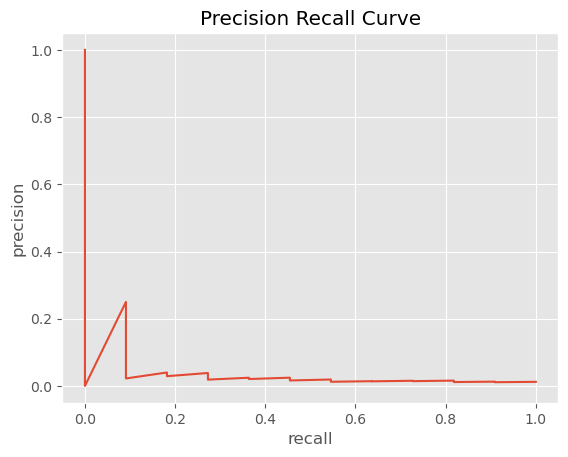

In [59]:
plt.title("Precision Recall Curve")
plt.plot(recall, precision)
plt.xlabel("recall")
plt.ylabel("precision")

In [ ]:
# Run HGSCore accross the training data

In [ ]:
# Run your model accross the training data

In [ ]:
# plot a move of edges moving
A = M['As']
kernal = partial(mp._move_edges_j, n_edges = 11, n=len(A))
kernal = jax.jit(kernal)

n_frames = 100
key = jax.random.PRNGKey(13)
keys = jax.random.split(key, n_frames)
a = A

def create_frame(t, a):
    fig = plt.figure()
    a = kernal(keys[t], a, prob=0.5)
    a = np.array(a)
    
    plt.imshow(a)
    plt.title('Random Edge Sampling')
    plt.xlabel('j')
    plt.ylabel('i')
    plt.savefig(f'./img/03_log_composite_connectivity_prior__adjacency_example_{t}.png')
    plt.close()
    return a
    
for t in range(n_frames):
    a = create_frame(t, a)
    
frames = []
for t in range(n_frames):
    image = imageio.v2.imread(f'./img/03_log_composite_connectivity_prior__adjacency_example_{t}.png')
    frames.append(image)

# combine frames into a gif

In [ ]:
imageio.mimsave('./gif/03_log_composite_connectivity_prior__adjacency_example.gif', frames, fps=5)

In [ ]:
from IPython.display import Image

![SegmentLocal](./gif/03_log_composite_connectivity_prior__adjacency_example.gif "segment")

In [ ]:
%%bash
ls ./gif

In [ ]:
a = create_frame(0, a)

In [ ]:
# Example GIF
import imageio
from IPython.display import Image
Image(filename="./img/img_0.png")
x = [1, 2, 3, 4, 4, 4, 4, 3, 2, 1, 1, 1, 1]
y = [1, 1, 1, 1, 2, 3, 4, 4, 4, 4, 3, 2, 1]
time = list(range(13))
def create_frame(t):
    fig = plt.figure(figsize=(6, 6))    
    plt.plot(x[:(t+1)], y[:(t+1)], color = 'grey' )
    plt.plot(x[t], y[t], color = 'black', marker = 'o' )    
    plt.xlim([0,5])
    plt.xlabel('x', fontsize = 14)
    plt.ylim([0,5])
    plt.ylabel('y', fontsize = 14)
    plt.title(f'Relationship between x and y at step {t}',
              fontsize=14)    
    plt.savefig(f'./img/img_{t}.png', 
                transparent = False,  
                facecolor = 'white'
               )    
    plt.close()


create_frame(0)

# create a bunch of frames
for t in time:
    create_frame(t)

frames = []
for t in time:
    image = imageio.v2.imread(f"./img/img_{t}.png")
    frames.append(image)

# combine frames into a gif

imageio.mimsave('./gif/example.gif', frames, fps=5)

![SegmentLocal](./gif/example.gif "segment")

In [ ]:
plt.show('./img/img_0.png')

In [ ]:
# Plotting code

import itertools

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

plt.rcParams['animation.ffmpeg_path'] = '/home/aji/anaconda3/envs/pynetp3.10.0/bin/ffmpeg'


fig, ax = plt.subplots()
im = ax.imshow(A)

n_frames = 100
key = jax.random.PRNGKey(13)
keys = jax.random.split(key, n_frames)
def init():
    return im

def func(frame):
    
    index = int(frame)
    a = kernal(keys[index], a, prob=0.5)
    a = np.array(a)
    im.set_data(a)
    return im

ani = animation.FuncAnimation(fig, func, data_gen, interval=n_frames, init_func=init,
                              save_count=100)

video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

In [ ]:
mp._move_edges_j(key, A, prob=0.5, n_edges=2, n=10)

In [ ]:
def init():
    A = np.array(A)
    im = ax.imshow(A)
    return im
    
def func(A):
    A = np.array(A)
    im = ax.imshow(A)
    return im

#for frame in range(n_frames):
    #a = kernal(keys[frame], a, prob=0.5)
    

ani = animation.FuncAnimation(fig, func, data_gen, interval=100, init_func=init,
                              save_count=100)
video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

In [ ]:
?ax.imshow


In [ ]:


def data_gen():
    for cnt in itertools.count():
        t = cnt / 10
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)


def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 1)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

# Only save last 100 frames, but run forever
ani = animation.FuncAnimation(fig, run, data_gen, interval=100, init_func=init,
                              save_count=1000)

video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

In [ ]:
?animation.FuncAnimation

In [ ]:
plt.show(ani)

In [ ]:
%%bash
which ffmpeg

In [ ]:
loc = 0.6
scale = 0.08
x = np.arange(-1 + loc, 1.1 + loc, 0.1)
plt.plot(x, sp.stats.norm.logpdf(x, loc=loc, scale=scale))

In [ ]:
Ak = np.tril(A, k=-1)
U = np.triu(np.ones((44, 44)))
Ak = Ak + U

In [ ]:
plt.imshow(Ak)

In [ ]:
i_s, j_s = np.where(Ak == 0)

In [ ]:
A[i_s, j_s]

In [ ]:
cb.data.loc[:, ["r1", "r2", "r3", "r4"]].values

In [ ]:
mp.d(np.zeros((44, 44), dtype=int), np.arange(44))

In [ ]:
lambdas = [0.1, 1, 10]
def gen_data(lambda_s, density=False):
    ys = []
    xs = []
    for i in range(1, len(A)+1):
        Cs = np.arange(i)

        n_dis = m.d(A, Cs)
        score = m.log_pdf_As__Cs_lambda_s(A, Cs, lambda_s)
        ys.append(score)
        xs.append(n_dis)
    if density:
        xs = xs
        ys = np.exp(ys)
    return xs, ys
        
density = True
xs, ys = gen_data(0.1, density=density)
xs_1, ys_1 = gen_data(1, density=density)
xs_10, ys_10 = gen_data(2, density=density)


In [ ]:
def plot_composite_connectivity():
    plt.title("Composite connectivity restraint")
    plt.style.use('ggplot')
    plt.plot(xs, ys, 'g.', label=u'\u03BB 0.1')
    plt.plot(xs_1, ys_1, 'r.', label=u'\u03BB 1')
    plt.plot(xs_10, ys_10, 'b.', label=u'\u03BB 10')
    plt.xlabel('Disconnected prey')
    plt.ylabel('P(As | Cs, lambda_s)')
    plt.legend()

In [ ]:
def a(x):
    return x + 1

def b(x):
    return x + x

c = jax.jit(a)
d = jax.jit(lambda x: a(b(x)))
e = jax.jit(lambda x: c(b(x)))

In [ ]:
jax.make_jaxpr(d)(2)

In [ ]:
# Conclusion - jitting an inner function and then 
jax.make_jaxpr(e)(2)

##### plt.title("Composite connectivity log density")
plt.style.use('ggplot')
plt.plot(xs, np.log(ys), 'g-', label=u'\u03BB 0.1')
plt.plot(xs_1, np.log(ys_1), 'r-', label=u'\u03BB 1')
plt.plot(xs_10, np.log(ys_10), 'b-', label=u'\u03BB 10')
plt.xlabel('Disconnected prey')
plt.ylabel('log P(As | Cs, lambda_s)')
plt.legend()